 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1066]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [1070]:
Path.cwd()                                                                                                                                                                                                                                                                                                                                                                                                       

WindowsPath('C:/Users/herve/Jupyterlab_Workspace/UofM-VIRT-FIN-PT-11-2023-U-LOLC/02-Homework/04-Pandas/Instructions/Starter_Code')

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [1074]:
# Reading whale returns
whale_Path = Path('C:/Users/herve/Jupyterlab_Workspace/UofM-VIRT-FIN-PT-11-2023-U-LOLC/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_Path, index_col="Date", infer_datetime_format = True, parse_dates = True)
whale_df = whale_df.sort_index()
whale_df.head()


C:\Users\herve\AppData\Local\Temp\ipykernel_13236\2198540027.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_Path, index_col="Date", infer_datetime_format = True, parse_dates = True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [1076]:
# Count nulls
whale_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [1078]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [1081]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [1083]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [1086]:
# Reading algorithmic returns
algo_Path = Path('C:/Users/herve/Jupyterlab_Workspace/UofM-VIRT-FIN-PT-11-2023-U-LOLC/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_Path, index_col="Date",  infer_datetime_format = True, parse_dates = True)
alg0_df = algo_df.sort_index()
algo_df.head()

C:\Users\herve\AppData\Local\Temp\ipykernel_13236\2813910053.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_Path, index_col="Date",  infer_datetime_format = True, parse_dates = True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [1088]:
# Count nulls
algo_df.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [1090]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [1092]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [1095]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [1097]:
# Reading S&P 500 Closing Prices
sp500_Path = Path('C:/Users/herve/Jupyterlab_Workspace/UofM-VIRT-FIN-PT-11-2023-U-LOLC/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_Path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
sp500_df = sp500_df.sort_index()
sp500_df.head()

C:\Users\herve\AppData\Local\Temp\ipykernel_13236\1027316986.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_Path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
C:\Users\herve\AppData\Local\Temp\ipykernel_13236\1027316986.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_Path, index_col = "Date", infer_datetime_format = True, parse_dates = True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [1099]:
# Reading S&P 500 Closing Prices
sp500_Path = Path('C:/Users/herve/Jupyterlab_Workspace/UofM-VIRT-FIN-PT-11-2023-U-LOLC/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_Path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
sp500_df = sp500_df.sort_index()
sp500_df.head()

C:\Users\herve\AppData\Local\Temp\ipykernel_13236\1027316986.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_Path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
C:\Users\herve\AppData\Local\Temp\ipykernel_13236\1027316986.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_Path, index_col = "Date", infer_datetime_format = True, parse_dates = True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [1101]:
sp500_df.index

DatetimeIndex(['2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04',
               '2012-10-05', '2012-10-08', '2012-10-09', '2012-10-10',
               '2012-10-11', '2012-10-12',
               ...
               '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
               '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18',
               '2019-04-22', '2019-04-23'],
              dtype='datetime64[ns]', name='Date', length=1649, freq=None)

In [1103]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [1105]:
# Fix Data Types
# sp500_df['Close'] = sp500_df['Close'].astype(str)
# print (sp500_df.dtypes)
sp500_df['Close']=sp500_df['Close'].str.replace("$", "").replace(",", "").astype("float")
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [1107]:
type(sp500_df["Close"])

pandas.core.series.Series

In [1109]:
sp500_df.dtypes

Close    float64
dtype: object

In [1111]:
# Calculate Daily Return
sp500_df_returns = sp500_df.pct_change()
sp500_df_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [1113]:
# Drop nulls
sp500_df_returns = sp500_df_returns.dropna().copy()
sp500_df_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [1115]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df_returns = sp500_df_returns.rename(columns={"Close":"SP500"})
sp500_df_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [1118]:
sp500_df_returns

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [1120]:
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [1122]:
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [1124]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_df, algo_df], axis=1, join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


---

In [1127]:
combined_df.index

DatetimeIndex(['2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06',
               '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12',
               '2015-03-13', '2015-03-16',
               ...
               '2019-04-17', '2019-04-18', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29',
               '2019-04-30', '2019-05-01'],
              dtype='datetime64[ns]', name='Date', length=1049, freq=None)

In [1129]:
sp500_df_returns.index

DatetimeIndex(['2012-10-02', '2012-10-03', '2012-10-04', '2012-10-05',
               '2012-10-08', '2012-10-09', '2012-10-10', '2012-10-11',
               '2012-10-12', '2012-10-15',
               ...
               '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
               '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18',
               '2019-04-22', '2019-04-23'],
              dtype='datetime64[ns]', name='Date', length=1648, freq=None)

In [1131]:

combined_df = pd.concat([combined_df, sp500_df_returns], axis=1, join='inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [1133]:
columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON CO INC',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP500']
combined_df.columns = columns
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

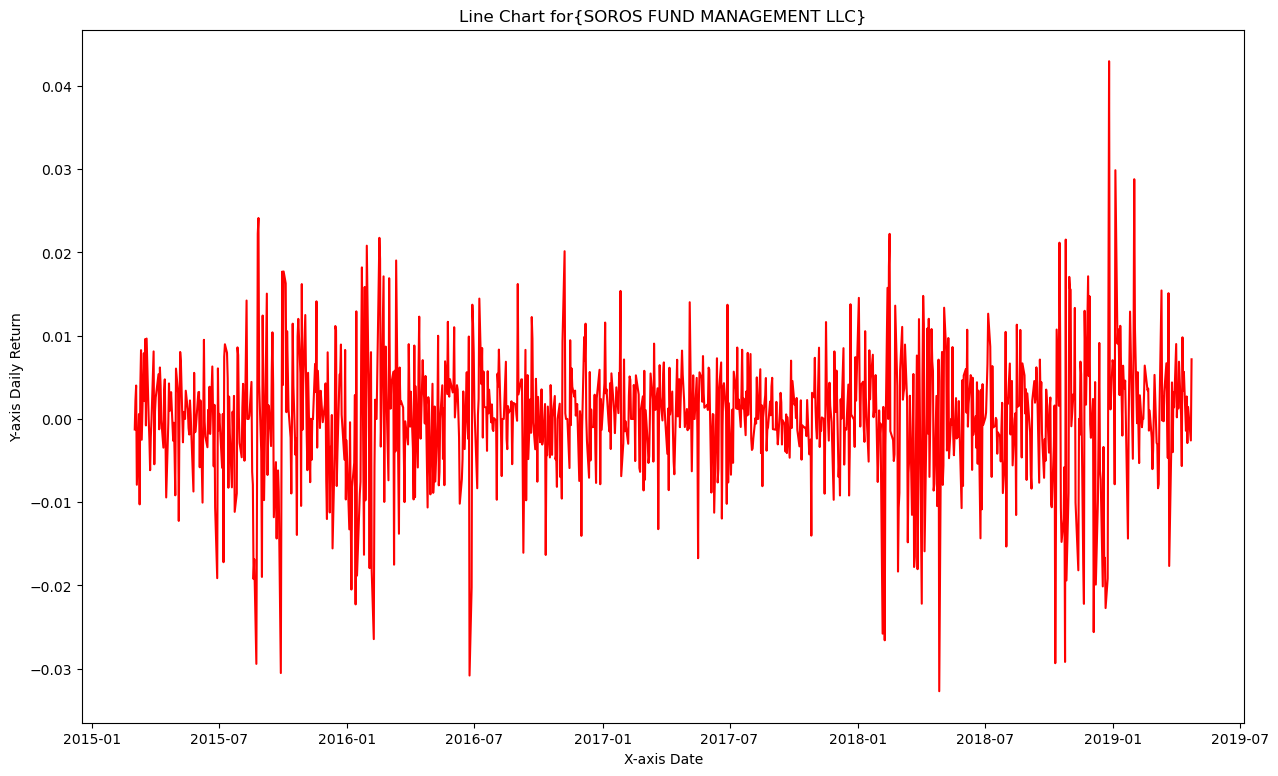

In [1137]:
# Plot daily returns of all portfolios
plt.figure(figsize=(15,9))
plt.plot(combined_df.index,combined_df["SOROS FUND MANAGEMENT LLC"],color="red")
plt.xlabel("X-axis Date")
plt.ylabel("Y-axis Daily Return")
plt.title("Line Chart for{SOROS FUND MANAGEMENT LLC}")
plt.show()



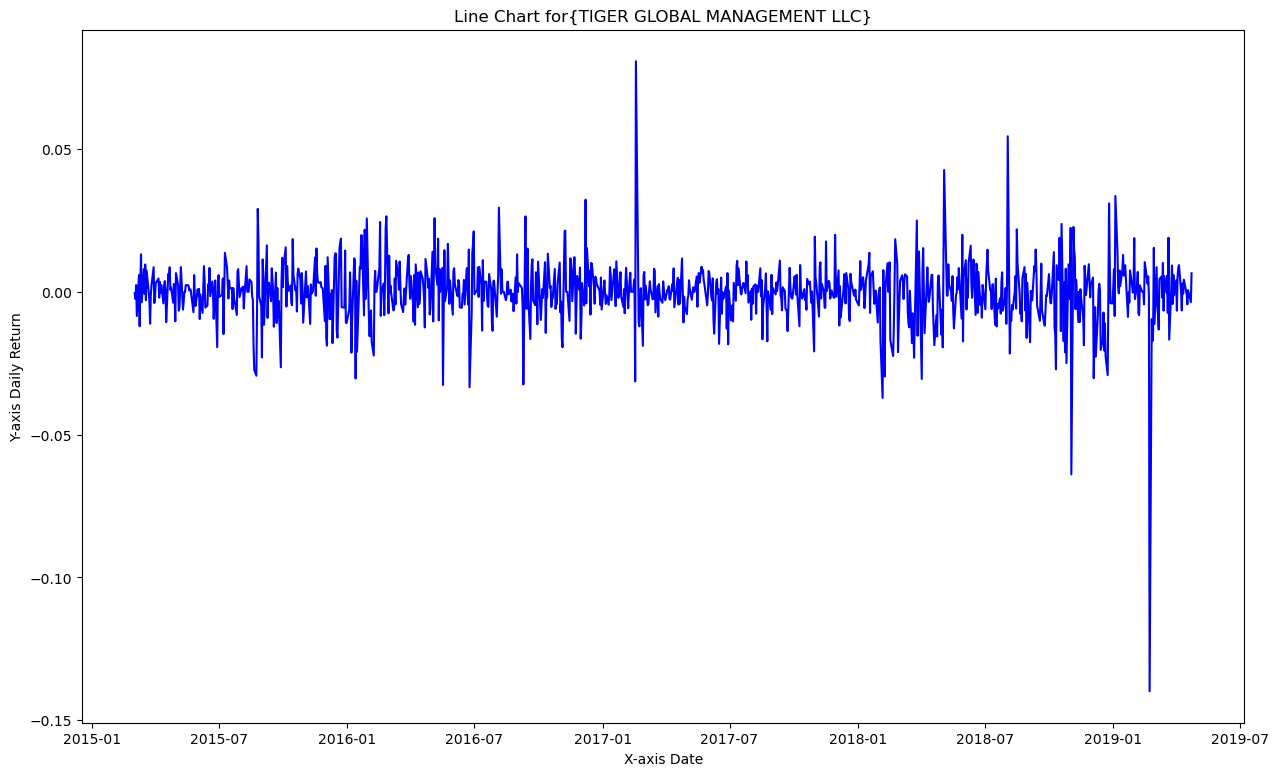

In [1139]:
# Plot daily returns of all portfolios
plt.figure(figsize=(15,9))
plt.plot(combined_df["TIGER GLOBAL MANAGEMENT LLC"],color="blue")
plt.xlabel("X-axis Date")
plt.ylabel("Y-axis Daily Return")
plt.title("Line Chart for{TIGER GLOBAL MANAGEMENT LLC}")
plt.show()


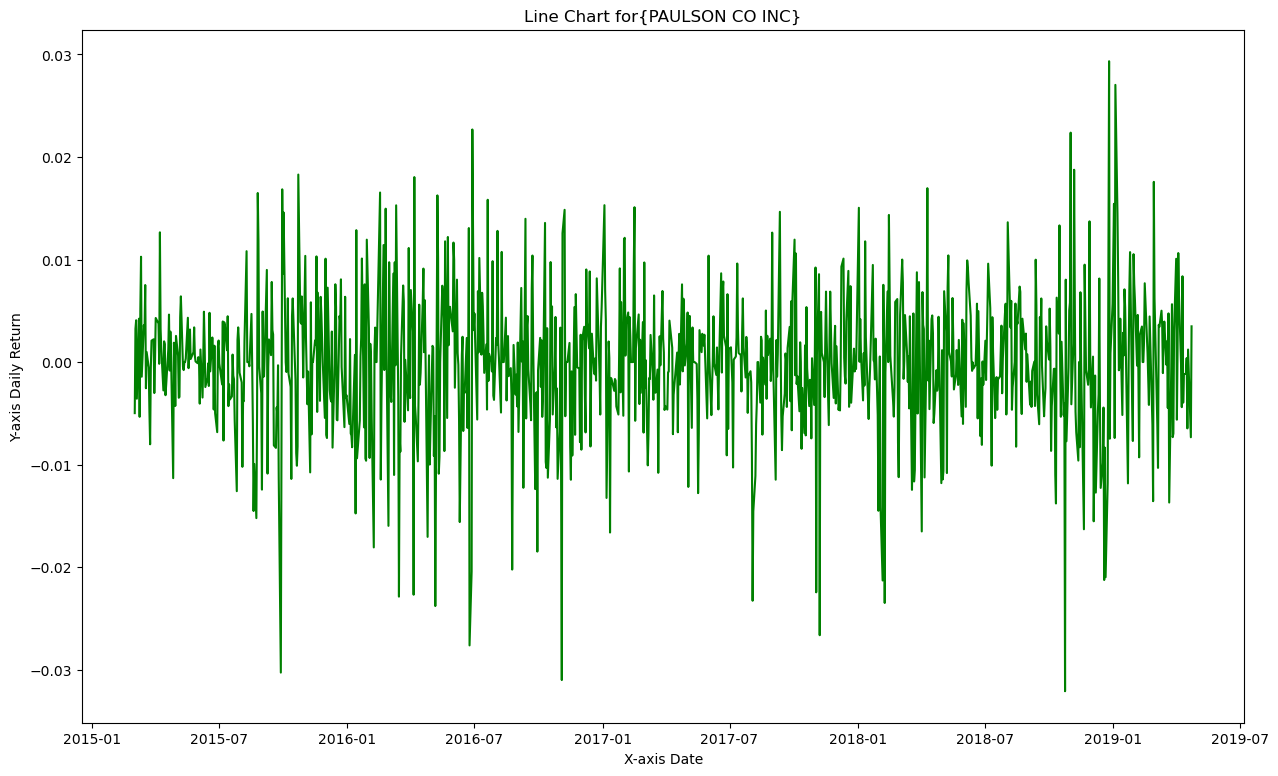

In [1141]:
# Plot daily returns of all portfolios
#plt.figure(figsize=(15,9))
#plt.plot(combined_df["PAULSON CO INC"],color="green")
#plt.xlabel("X-axis Date")
#plt.ylabel("Y-axis Daily Return")
#plt.title("Line Chart for{PAULSON CO INC}")
#plt.show()
# Plot daily returns of all portfolios
plt.figure(figsize=(15,9))
plt.plot(combined_df["PAULSON CO INC"] ,color="green")
plt.xlabel("X-axis Date")
plt.ylabel("Y-axis Daily Return")
plt.title("Line Chart for{PAULSON CO INC}")
plt.show()


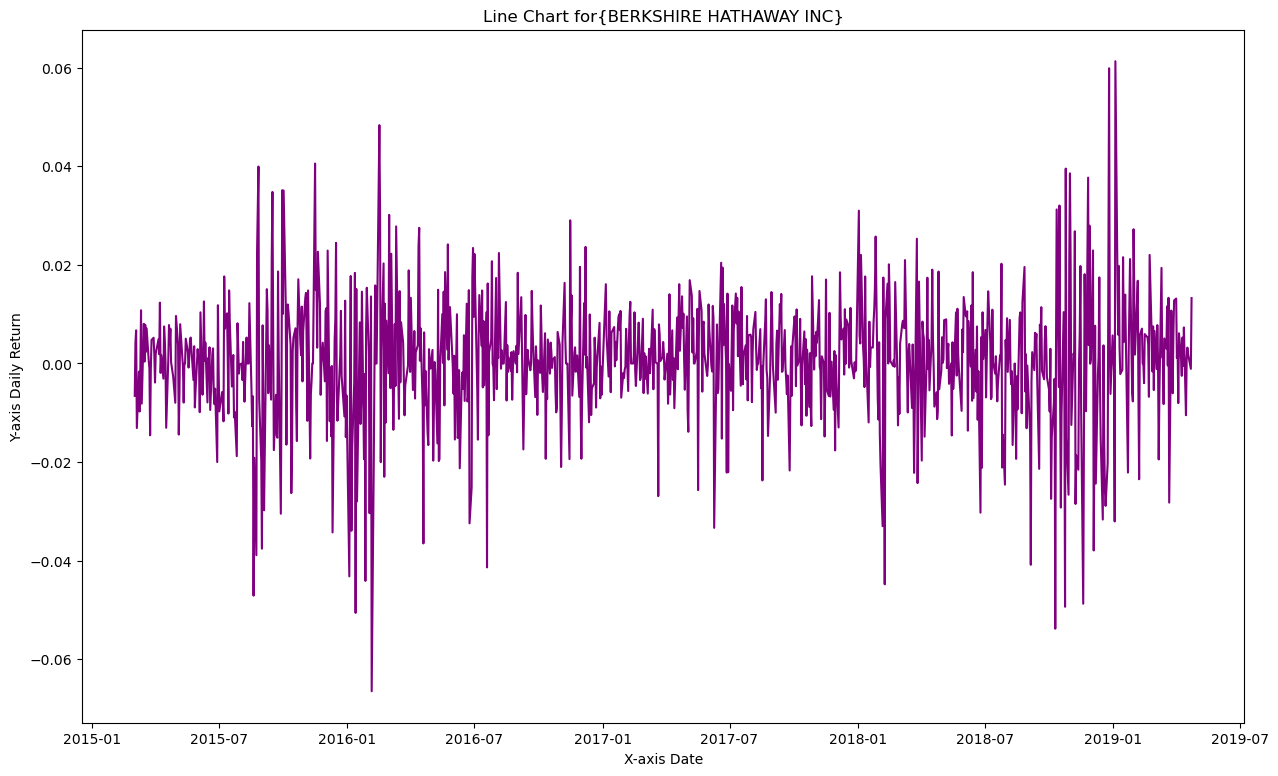

In [1144]:
# Plot daily returns of all portfolios
plt.figure(figsize=(15,9))
plt.plot(combined_df["BERKSHIRE HATHAWAY INC"],color="Purple")
plt.xlabel("X-axis Date")
plt.ylabel("Y-axis Daily Return")
plt.title("Line Chart for{BERKSHIRE HATHAWAY INC}")
plt.show()


#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

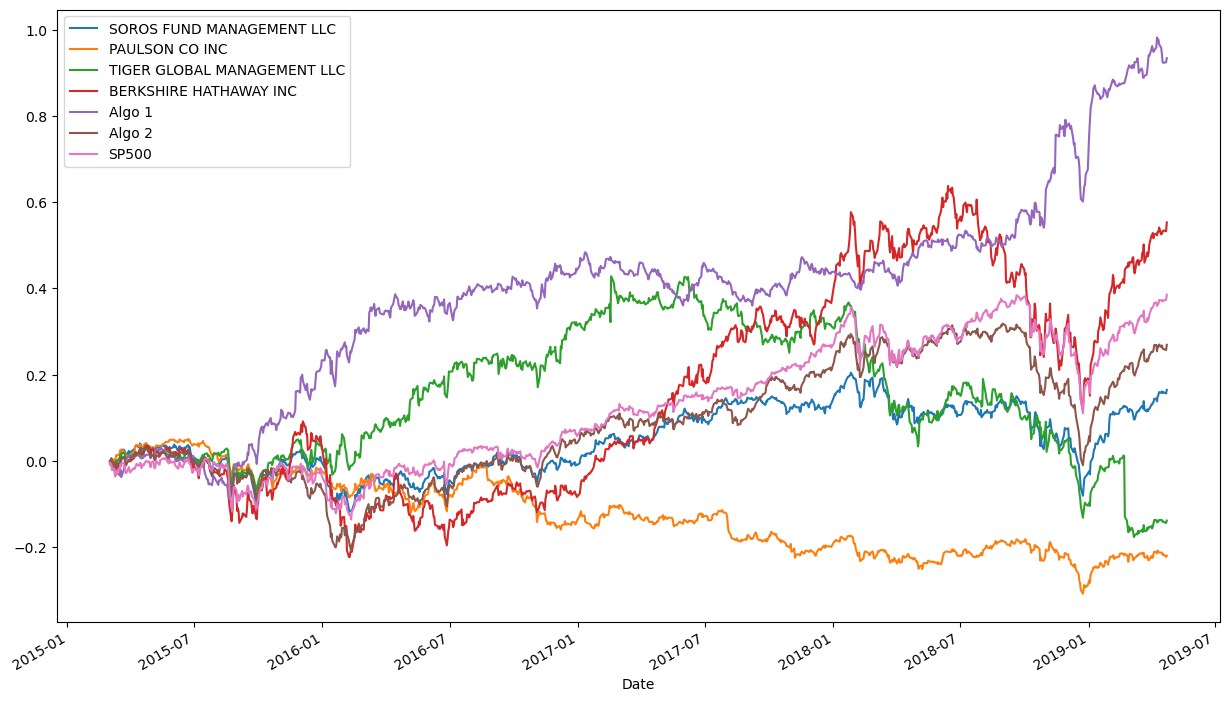

In [1147]:
# Calculate cumulative returns of all portfolios
TIGER_GLOBAL_MANAGEMENT_LLC = (1 + combined_df).cumprod() - 1
# Plot cumulative returns
TIGER_GLOBAL_MANAGEMENT_LLC.plot(figsize=(15,9))



---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


{'whiskers': [<matplotlib.lines.Line2D at 0x1d633f934d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d633fa8850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6325ed2d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1d633fa9790>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d633fa9f10>,
 'means': []}

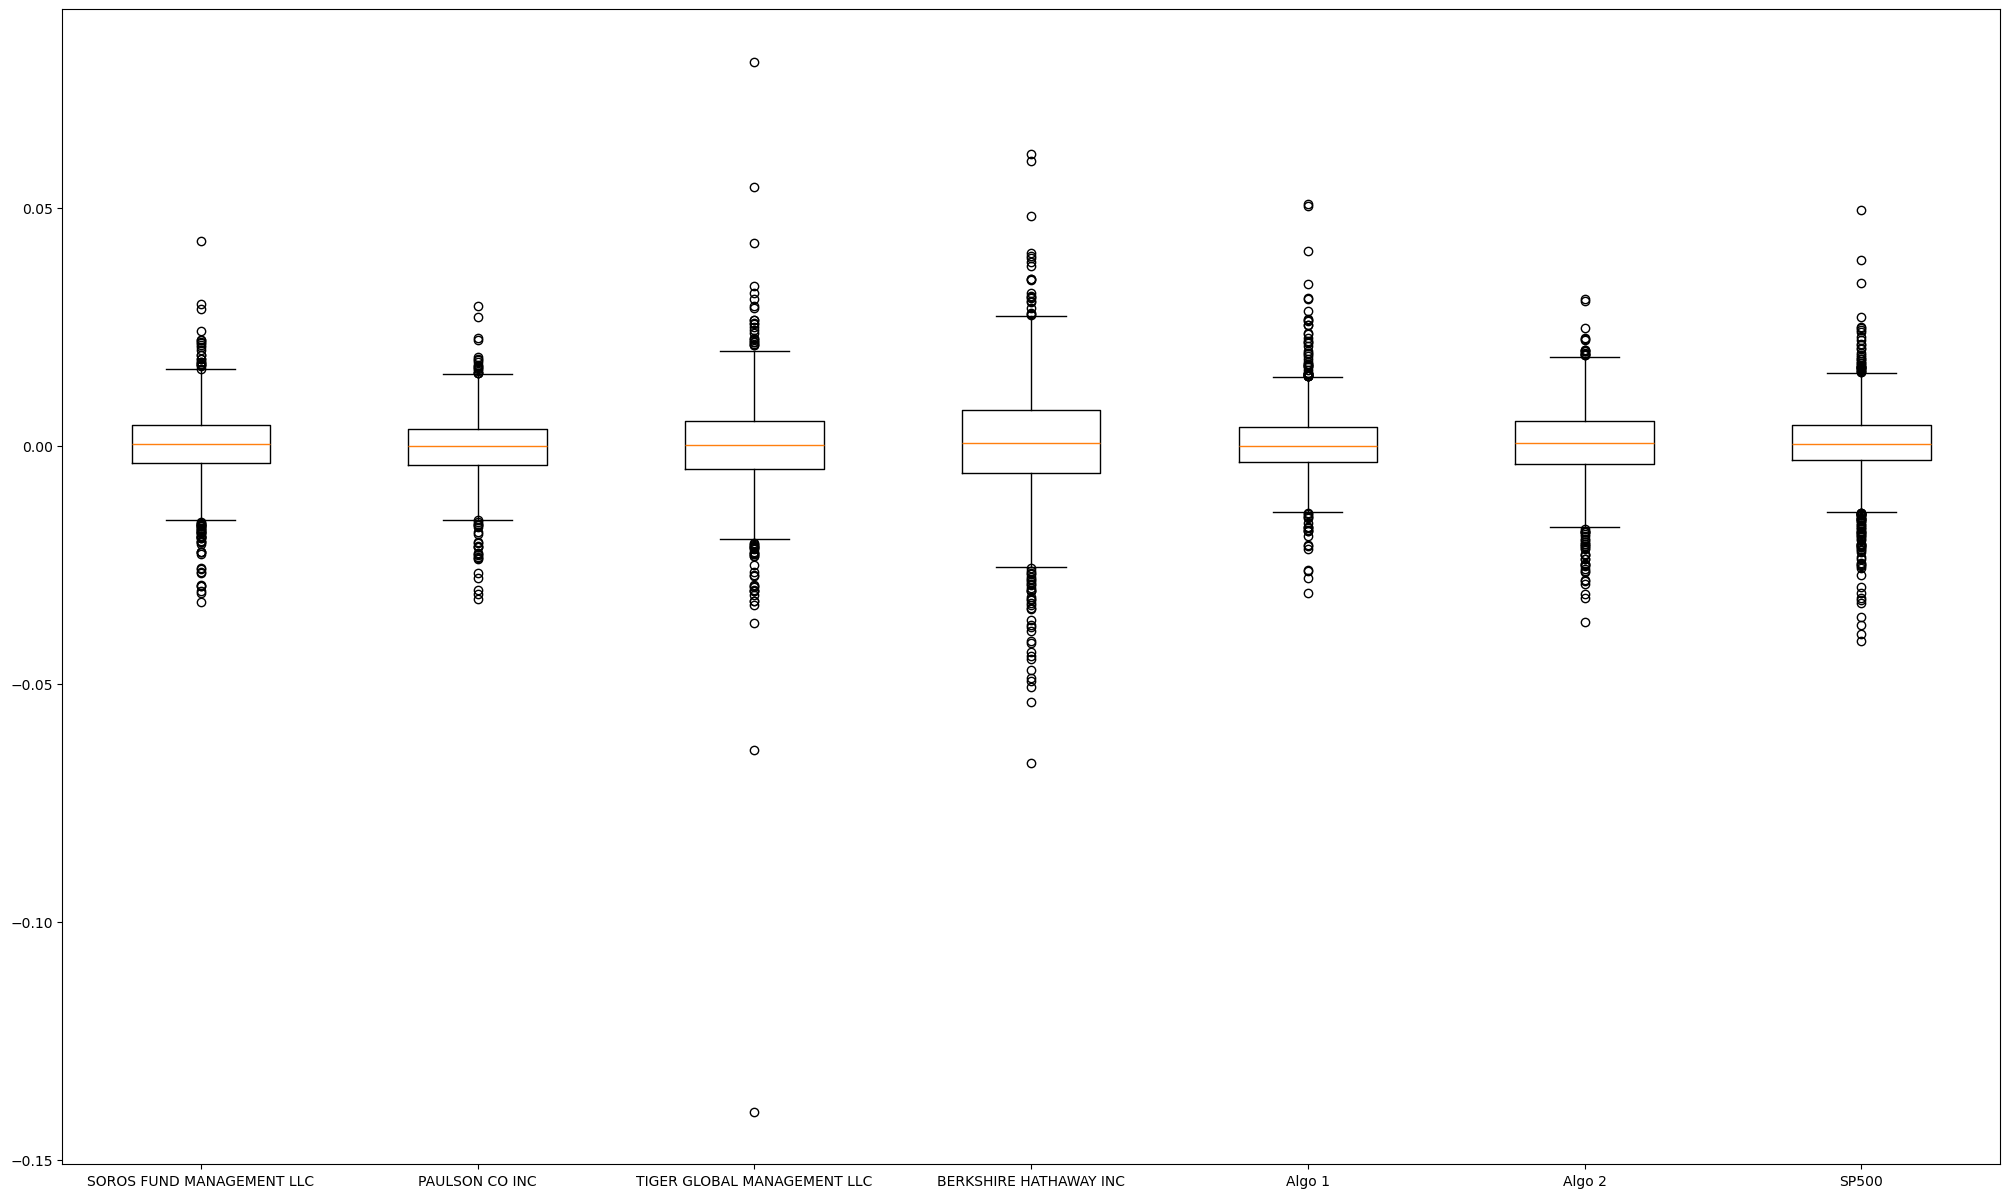

In [1152]:
# Box plot to visually show risk
plt.figure(figsize=(25,15))
plt.boxplot(combined_df, labels=combined_df.columns)

### Calculate Standard Deviations

In [1155]:
# Calculate the daily standard deviations of all portfolios
standard_deviation = np.std(combined_df)
standard_deviation

C:\Users\herve\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


SOROS FUND MANAGEMENT LLC      0.007892
PAULSON CO INC                 0.007020
TIGER GLOBAL MANAGEMENT LLC    0.010889
BERKSHIRE HATHAWAY INC         0.012912
Algo 1                         0.007617
Algo 2                         0.008338
SP500                          0.008550
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [1158]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
standard_deviation.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012912
TIGER GLOBAL MANAGEMENT LLC    0.010889
SP500                          0.008550
Algo 2                         0.008338
SOROS FUND MANAGEMENT LLC      0.007892
Algo 1                         0.007617
PAULSON CO INC                 0.007020
dtype: float64

### Calculate the Annualized Standard Deviation

In [1161]:
# Calculate the annualized standard deviation (252 trading days)

annual_std =standard_deviation*np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125275
PAULSON CO INC                 0.111434
TIGER GLOBAL MANAGEMENT LLC    0.172853
BERKSHIRE HATHAWAY INC         0.204978
Algo 1                         0.120909
Algo 2                         0.132366
SP500                          0.135721
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

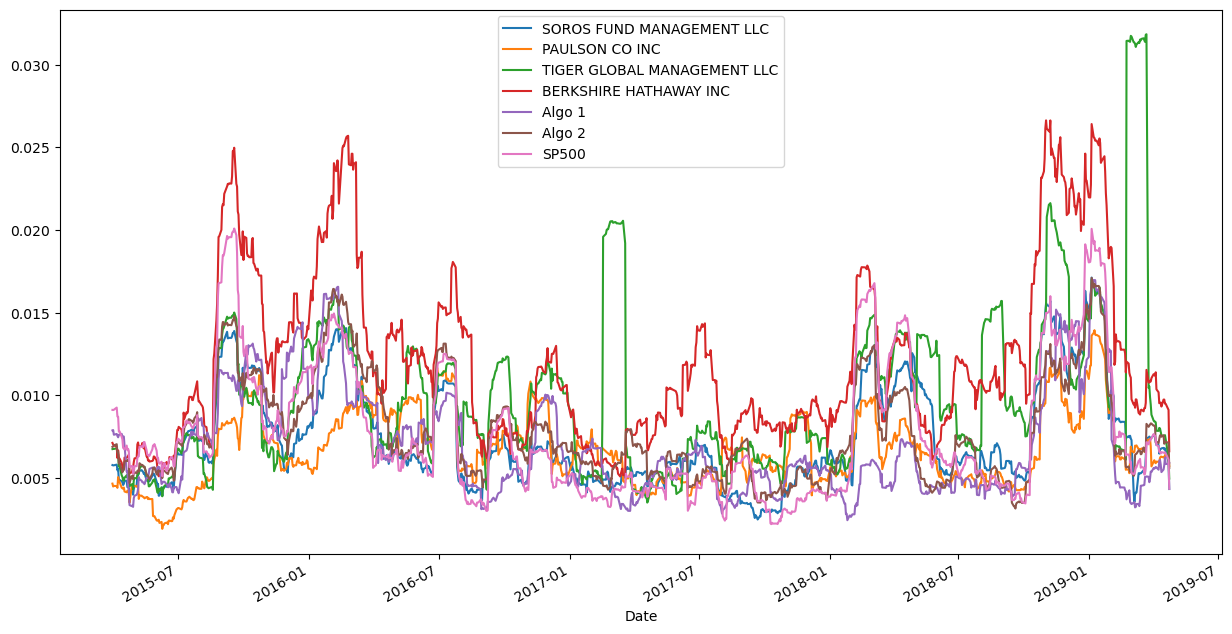

In [1166]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# std = standard_deviation.rolling(21)
combined_df_roll = combined_df.rolling(window=21).std()
combined_df_roll.plot(figsize=(15,8))
correlation = combined_df.corr()
# Plot the rolling standard deviation


### Calculate and plot the correlation

<Axes: >

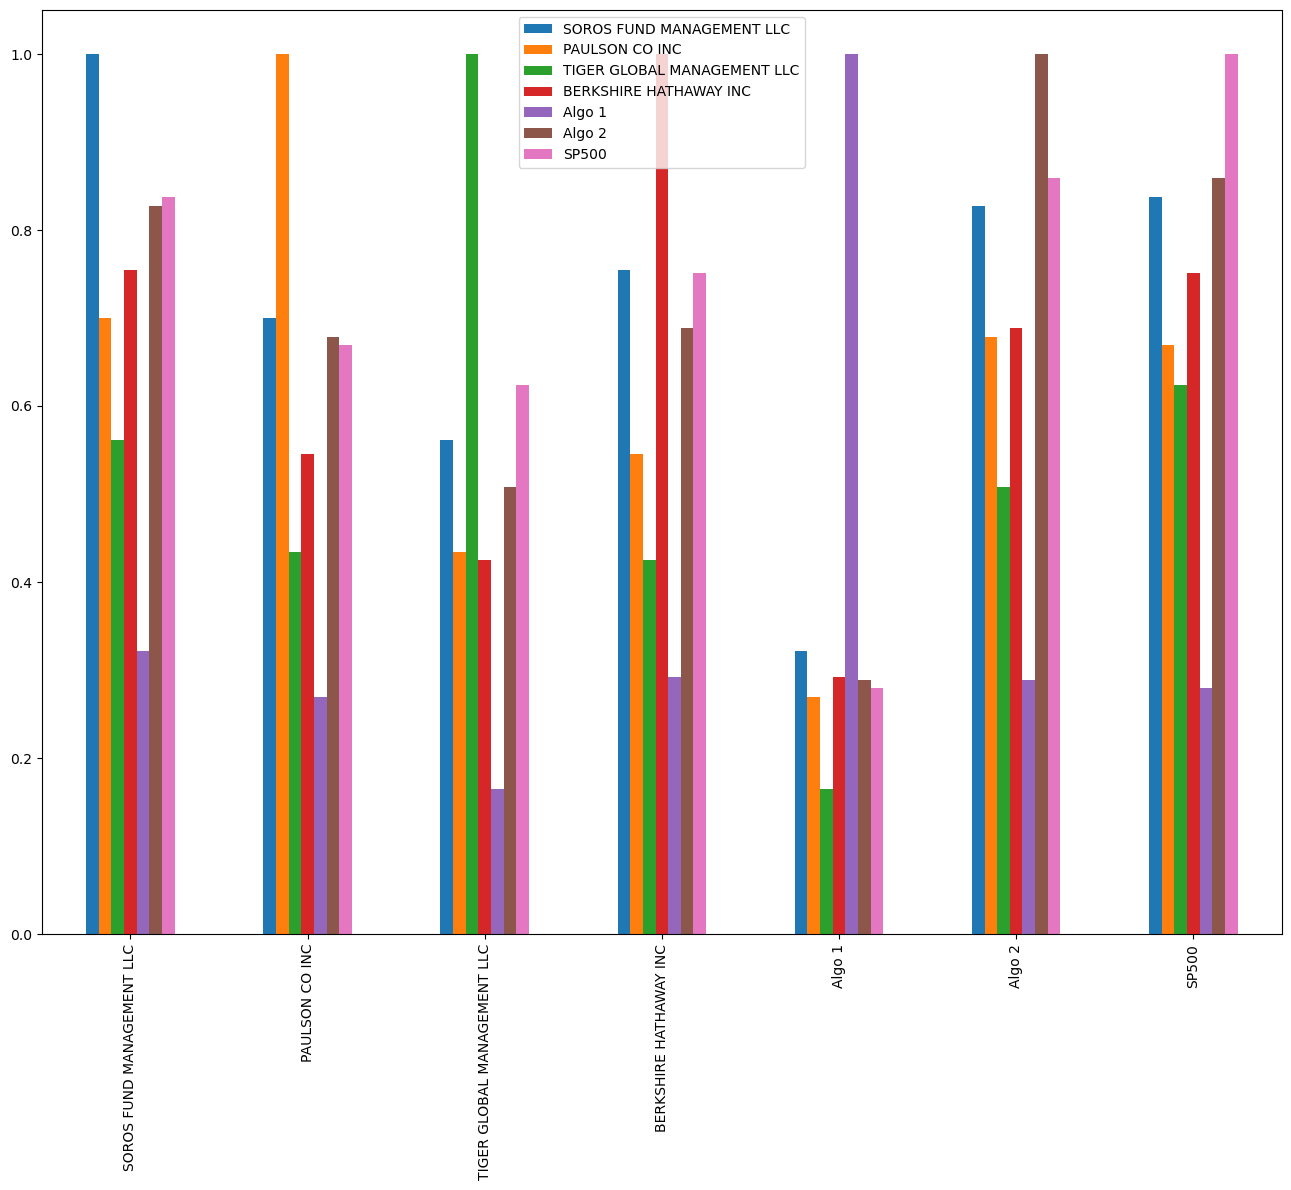

In [1169]:
# Calculate the correlation

correlation.plot.bar(figsize=(16,12))

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

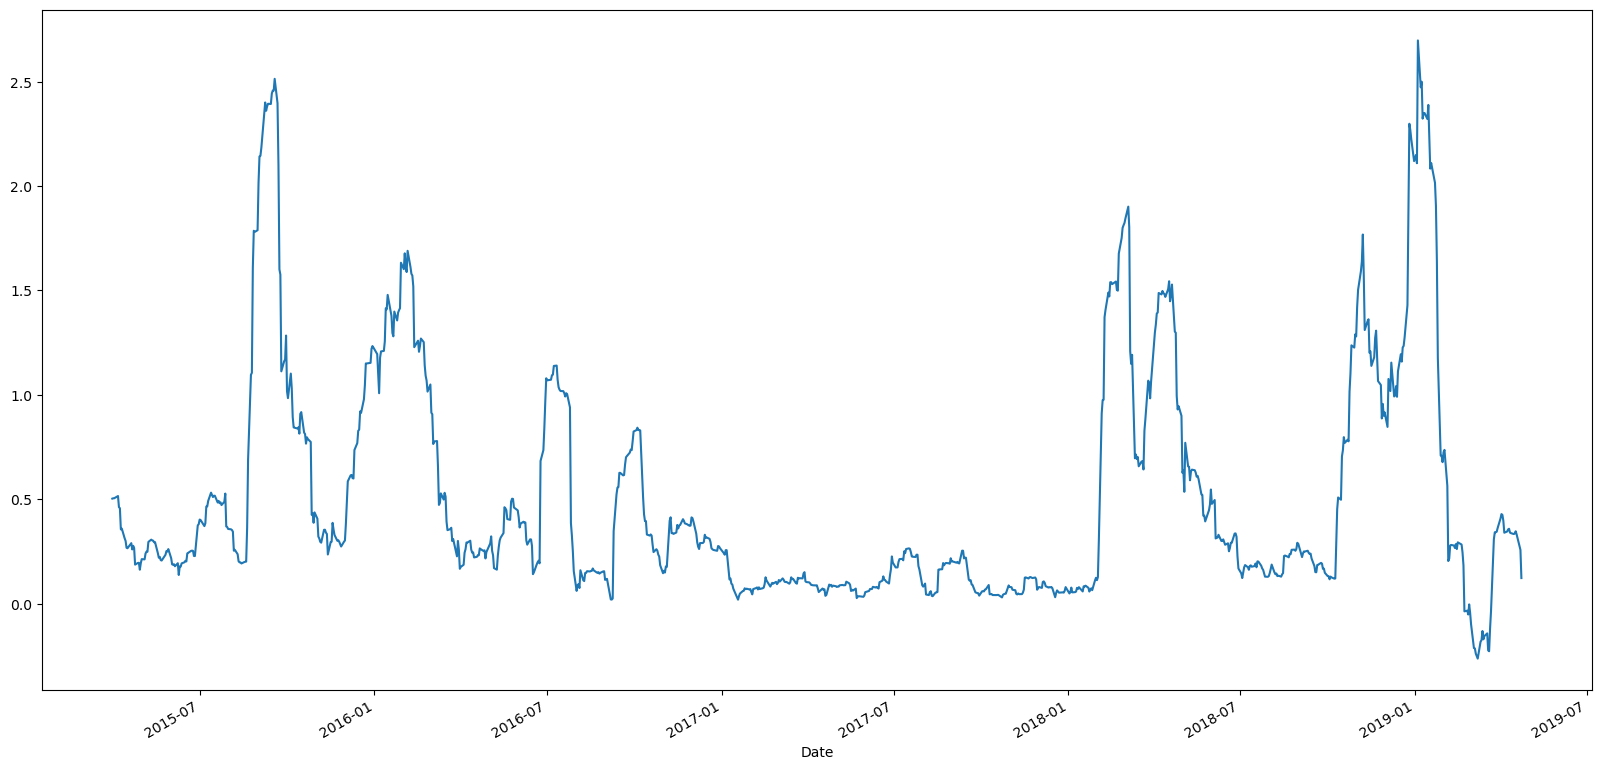

In [1172]:
# Calculate covariance of a single portfolio
covar = combined_df['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_df['SP500'])

# Calculate variance of S&P 500
var = combined_df['TIGER GLOBAL MANAGEMENT LLC'].var()
# Computing beta
Tiger_beta = covar / var
# Plot beta trend
graphable_cov = combined_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(21).cov(combined_df['SP500'])
graphable_var = combined_df['TIGER GLOBAL MANAGEMENT LLC'].var()
graphable_beta = graphable_cov/graphable_var
graphable_beta.plot(figsize=(20, 10))
# combined_df['SP500'].var()
# Computing beta
# print(covariance_df/(combined_df['SP500'].var()))
# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

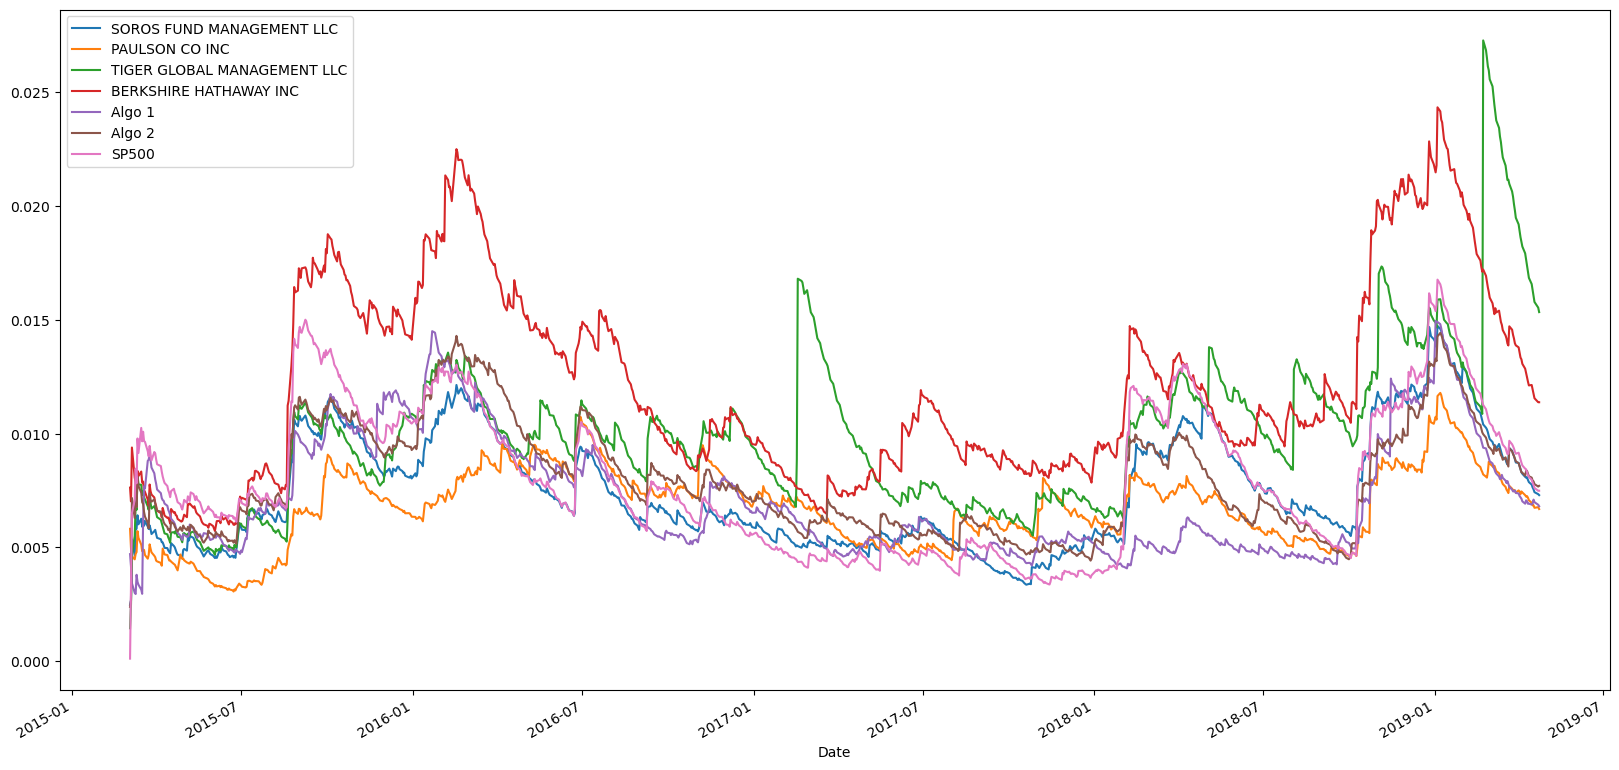

In [1175]:
# Use `ewm` to calculate the rolling window
rolling_stats = combined_df.ewm(halflife=21).std()
rolling_stats.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [1179]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean() * 252)/annual_std
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356588
PAULSON CO INC                -0.483802
TIGER GLOBAL MANAGEMENT LLC   -0.121118
BERKSHIRE HATHAWAY INC         0.622108
Algo 1                         1.379310
Algo 2                         0.501604
SP500                          0.648578
dtype: float64

<Axes: >

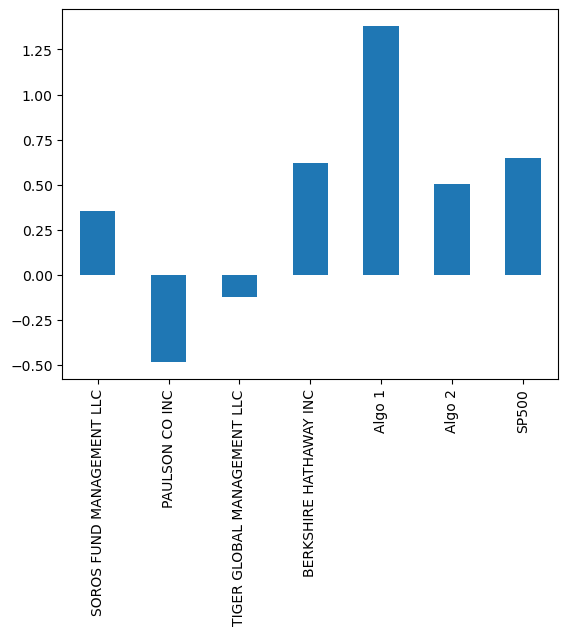

In [1181]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [1188]:
# Reading data from 1st stock
goog_Path = Path('C:/Users/herve/Jupyterlab_Workspace/UofM-VIRT-FIN-PT-11-2023-U-LOLC/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_Path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.rename( columns={"Symbol":"GOOG1","NOCP":"GOOG"}, inplace = True)
goog_df.drop(columns=["GOOG1"])

C:\Users\herve\AppData\Local\Temp\ipykernel_13236\1569344002.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_df = pd.read_csv(goog_Path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40
...,...
2018-05-17,1078.59
2018-05-16,1081.77
2018-05-15,1079.23


In [1190]:
# Reading data from 2nd stock
aapl_Path = Path('C:/Users/herve/Jupyterlab_Workspace/UofM-VIRT-FIN-PT-11-2023-U-LOLC/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_Path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.rename( columns={'Symbol':'AAPL1',"NOCP":"AAPL"}, inplace = True)
aapl_df.drop(columns=["AAPL1"])

C:\Users\herve\AppData\Local\Temp\ipykernel_13236\1328109046.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(aapl_Path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75
...,...
2018-05-17,186.99
2018-05-16,188.18
2018-05-15,186.44


In [1192]:
# Reading data from 3rd stock
cost_Path = Path('C:/Users/herve/Jupyterlab_Workspace/UofM-VIRT-FIN-PT-11-2023-U-LOLC/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_Path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.rename( columns={"Symbol":"COST1", "NOCP":"COST"}, inplace = True)
cost_df.drop(columns=["COST1"])

C:\Users\herve\AppData\Local\Temp\ipykernel_13236\2991073813.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_df = pd.read_csv(cost_Path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)


,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62
...,...
2018-05-17,199.60
2018-05-16,198.71
2018-05-15,195.48


In [1194]:
# Combine all stocks in a single DataFrame
combined_df1 = pd.concat([goog_df,aapl_df,cost_df], axis='columns', join='inner')
combined_df1= combined_df1.drop(columns=["GOOG1","AAPL1","COST1"])
combined_df1


,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [1196]:
# Reset Date index
combined_df1.sort_index(inplace = True)
combined_df1.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [1202]:
# Reorganize portfolio data by having a column per symbol
combined_df1

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [1212]:
# Calculate daily returns
daily_returns = combined_df1.pct_change()
# Drop NA
daily_returns = daily_returns.dropna()

# Display sample data
daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [1218]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
portfolio_returns_df = pd.DataFrame(portfolio_returns)
portfolio_returns_df.head()
# Display sample data


,0
Trade DATE,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [1226]:
# Join your returns DataFrame to the original returns DataFrame
combined_df2 = pd.concat([portfolio_returns_df, combined_df], axis='columns', join='inner')
combined_df2.rename(columns= {0: "MY_PORTFOLIO_RETURNS"},inplace = True )
combined_df2.dropna(inplace=True)
combined_df2.sort_index()
combined_df2.head()

,MY_PORTFOLIO_RETURNS,SOROS FUND MANAGEMENT LLC,PAULSON CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [1228]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df2.std()
annualized_variance_pt2 = (combined_df2.var()*252)
annualized_std_pt2 = np.sqrt(annualized_variance_pt2)
annualized_std_pt2

MY_PORTFOLIO_RETURNS           0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON CO INC                 0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500                          0.152054
dtype: float64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

<Axes: >

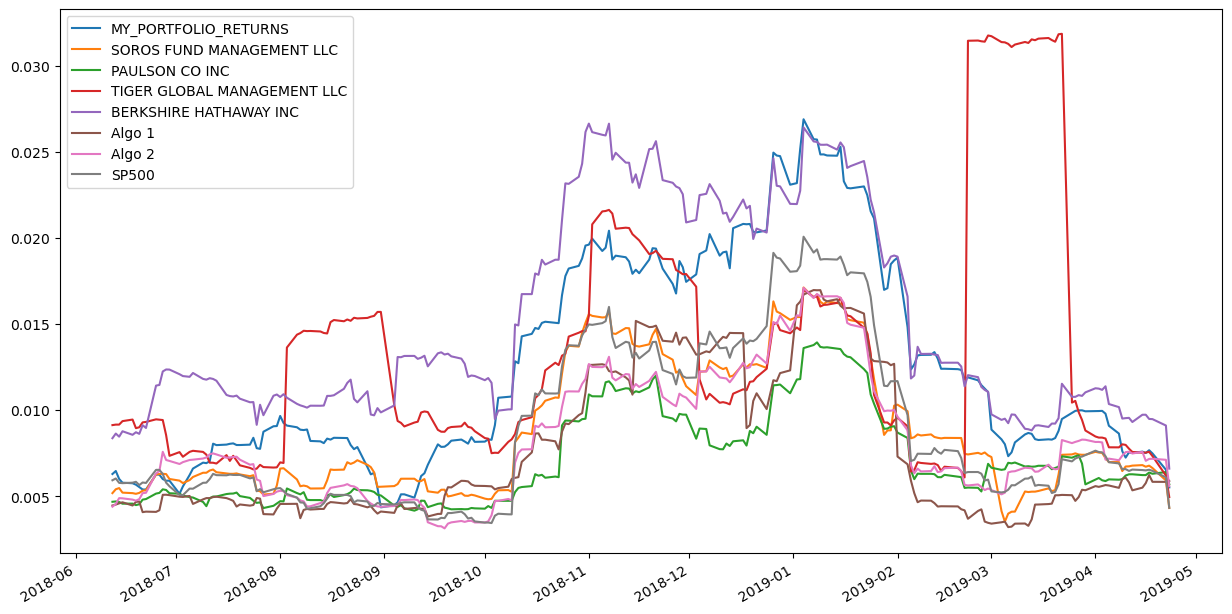

In [1230]:
# Calculate the annualized `std`
combined_df2.rolling(window=21).std().plot(figsize=(15,8))

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'MY_PORTFOLIO_RETURNS_BETA'}>

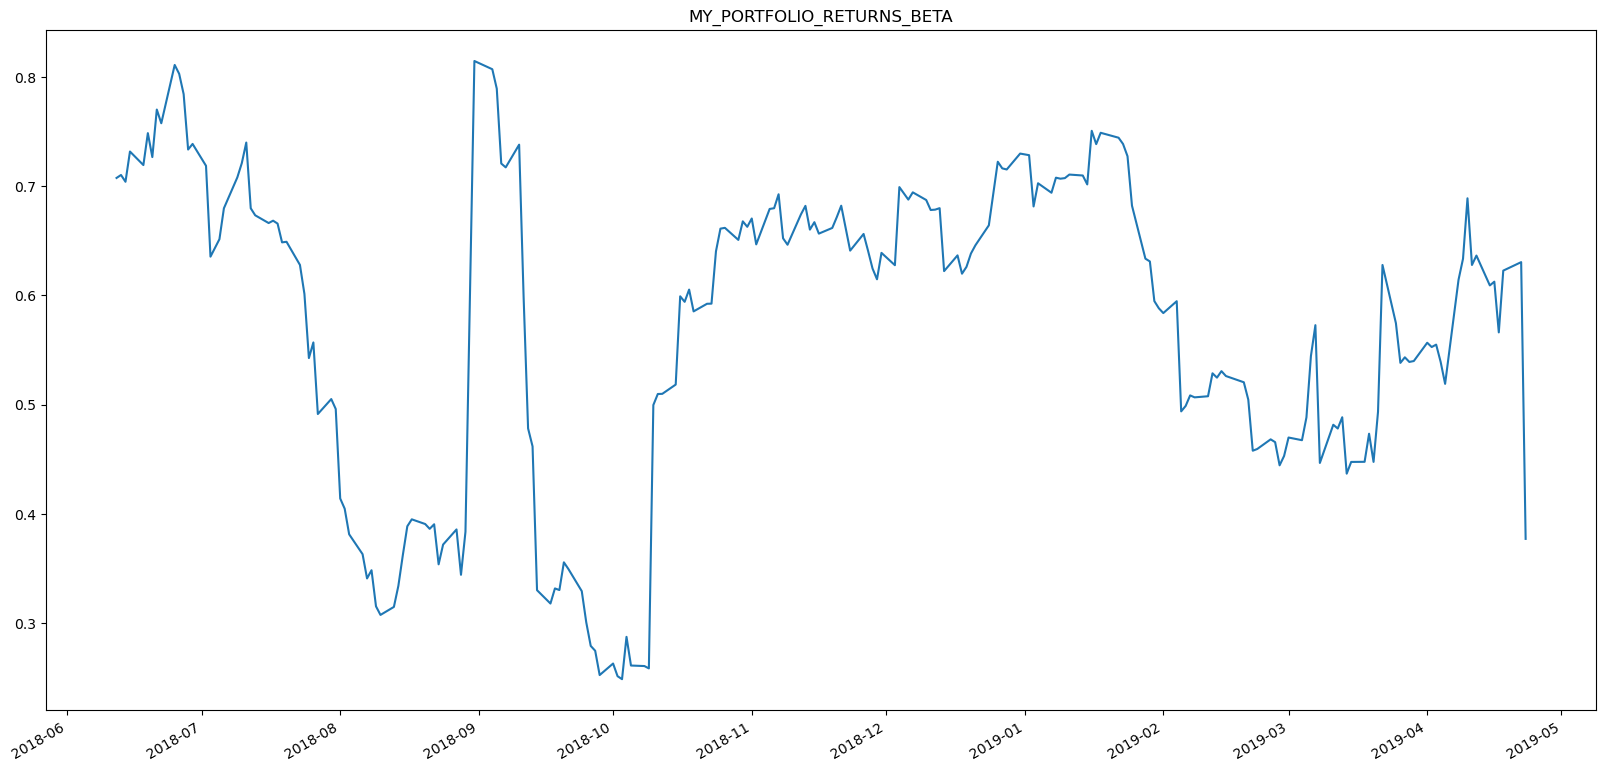

In [1236]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
rolling_variance = combined_df2['MY_PORTFOLIO_RETURNS'].rolling(window=21).var()
rolling_covariance = combined_df2['MY_PORTFOLIO_RETURNS'].rolling(window=21).cov(combined_df2['SP500'])
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='MY_PORTFOLIO_RETURNS_BETA')

### Calculate and plot the correlation

In [1238]:
# Calculate and plot the correlation
Total_correlation_all = (combined_df2.mean() * 252) / ((combined_df2).std() * np.sqrt(252))
Total_correlation_all

MY_PORTFOLIO_RETURNS           0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON CO INC                 0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                          0.584820
dtype: float64

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Total_correlation_all'}>

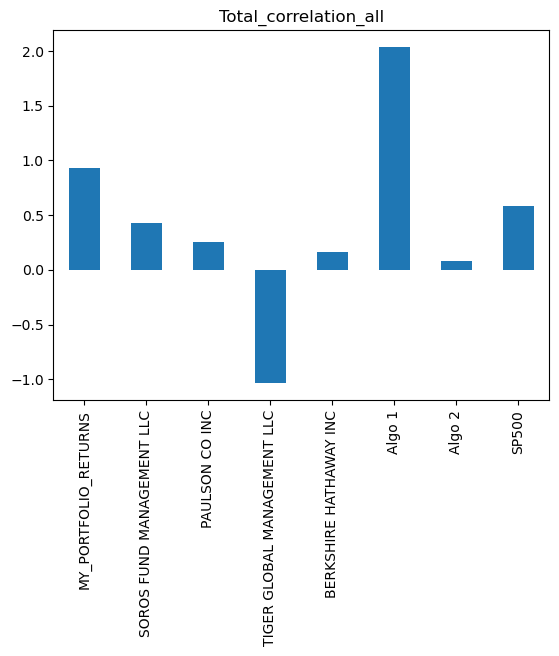

In [1240]:
# Calculate and plot Beta
Total_correlation_all.plot(kind="bar", title="Total_correlation_all")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [1242]:
# Calculate Annualized Sharpe Ratios
correlation = combined_df2.corr()
correlation

,MY_PORTFOLIO_RETURNS,SOROS FUND MANAGEMENT LLC,PAULSON CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
MY_PORTFOLIO_RETURNS,1.000000,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON CO INC,0.644210,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.391972,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.801158,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.261471,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.739936,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
SP500,0.871875,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


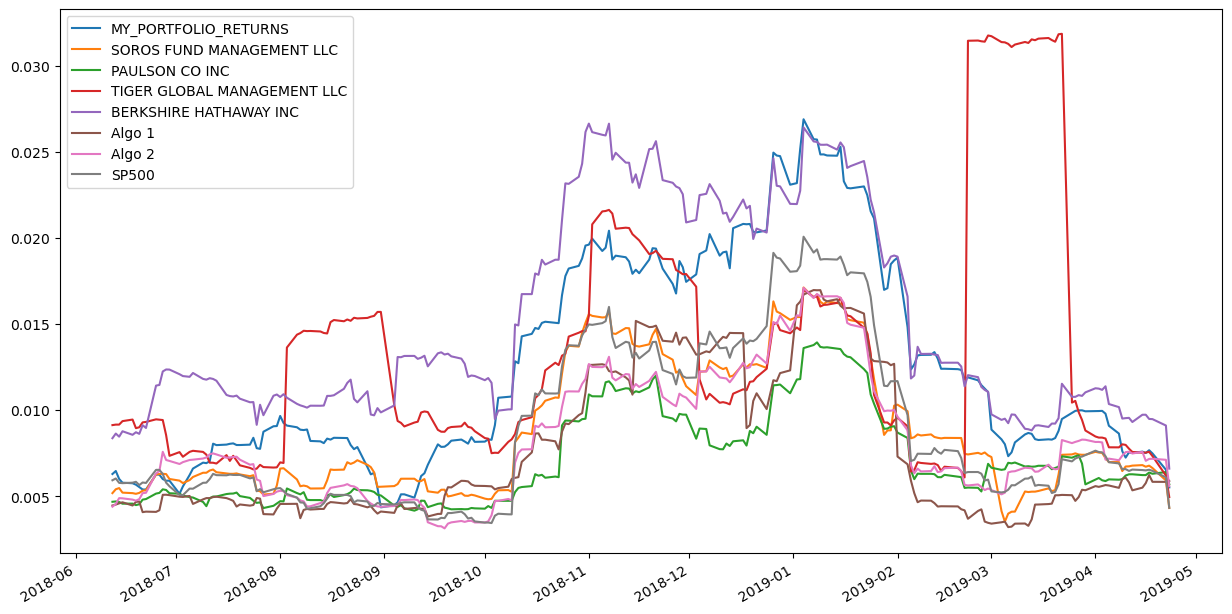

In [1254]:
# Visualize the sharpe ratios as a bar plot
#correlation = combined_df2.corr()
#correlation
combined_df2_roll = combined_df2.rolling(window=21).std()
combined_df2_roll.plot(figsize=(15,8))
correlation = combined_df2.corr()

### How does your portfolio do?

Write your answer here!